# Original data

Red areas in plot have abs correlation with either EOG channels > 0.5 

C:\Users\Lisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6144,min_periods=100,center=True).corr(other=<Series>)
C:\Users\Lisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6144,min_periods=100,center=True).corr(other=<Series>)


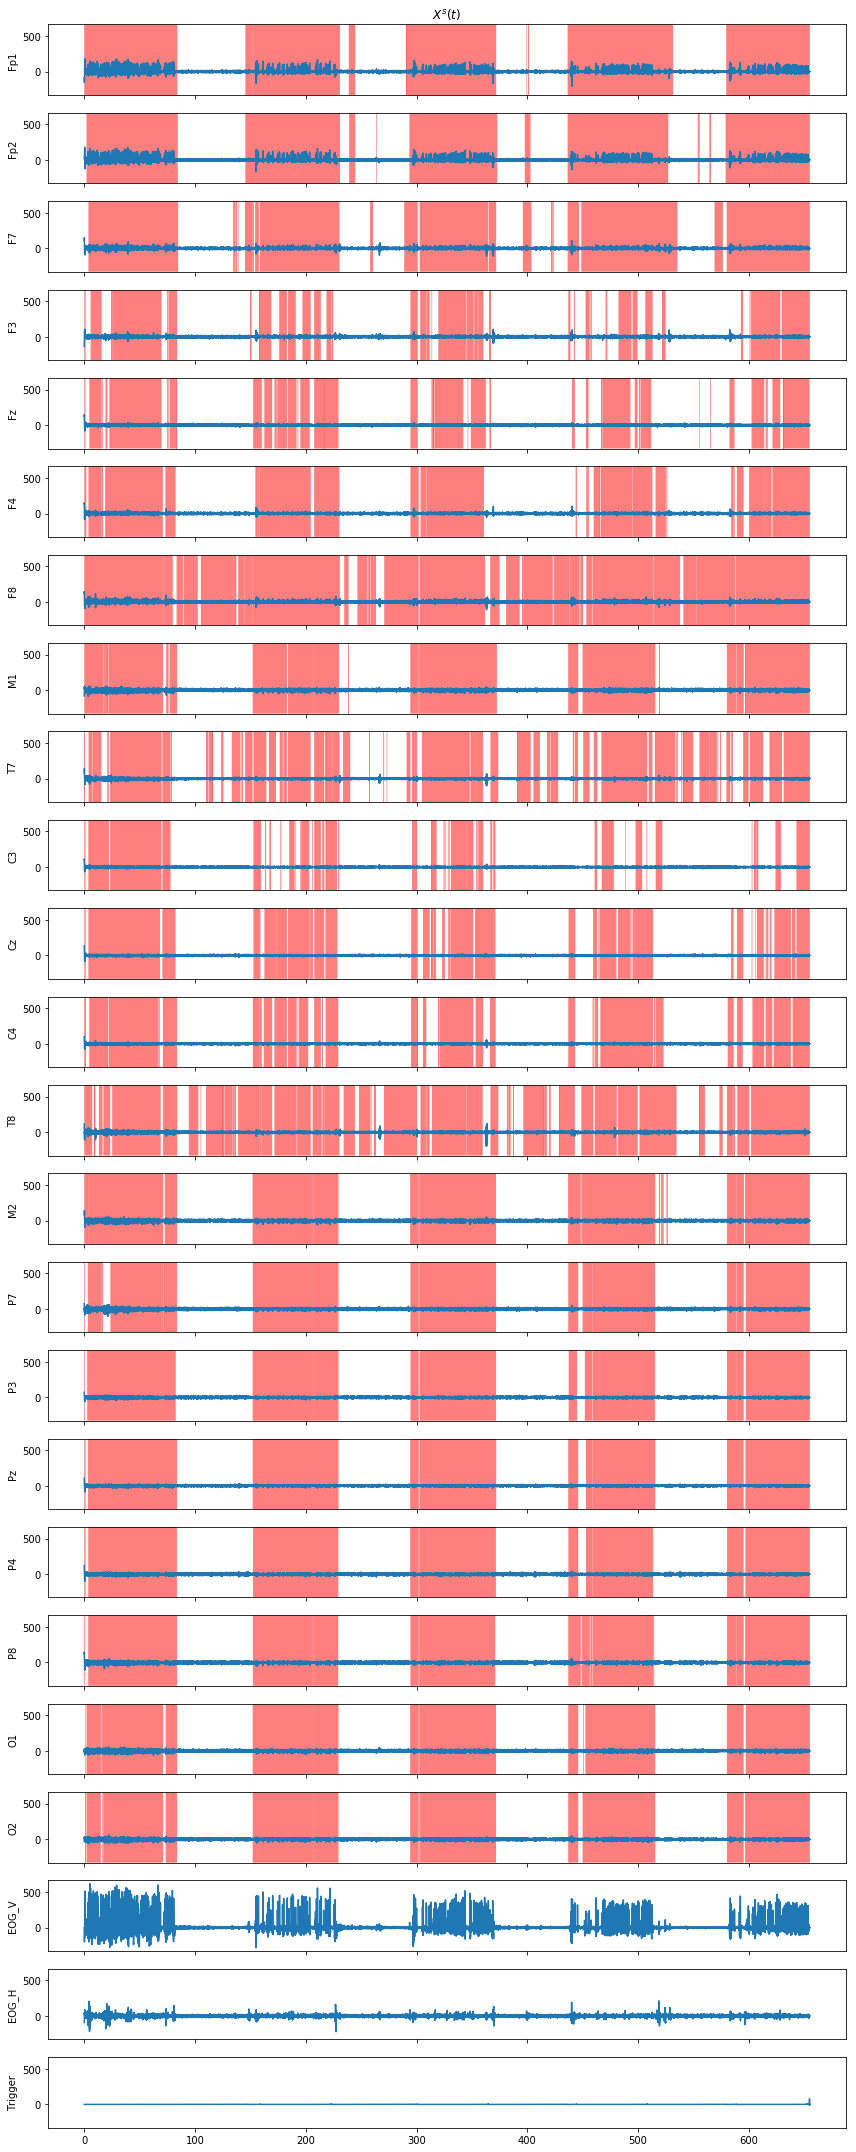

corr EOG_H,Fp1 = 0.7036995535235849
corr EOG_H,Fp2 = 0.7312851147844204
corr EOG_H,F7 = 0.46399358471117985
corr EOG_H,F3 = 0.42260000649955826
corr EOG_H,Fz = 0.4598216941795994
corr EOG_H,F4 = 0.4973471279678881
corr EOG_H,F8 = 0.5011384831599112
corr EOG_H,M1 = -0.5116781114120831
corr EOG_H,T7 = -0.38017455609074374
corr EOG_H,C3 = -0.2763121445292361
corr EOG_H,Cz = -0.2845548674138632
corr EOG_H,C4 = -0.3147312513613732
corr EOG_H,T8 = -0.3696513471611313
corr EOG_H,M2 = -0.5916531206991081
corr EOG_H,P7 = -0.5143124806707634
corr EOG_H,P3 = -0.5087672505400033
corr EOG_H,Pz = -0.5243699870479813
corr EOG_H,P4 = -0.520225552903459
corr EOG_H,P8 = -0.5342530617475503
corr EOG_H,O1 = -0.5324285808995113
corr EOG_H,O2 = -0.5528861142475741

corr EOG_V,Fp1 = 0.19827061196506596
corr EOG_V,Fp2 = -0.0028614639605306566
corr EOG_V,F7 = 0.48823798558745585
corr EOG_V,F3 = 0.23321041822768807
corr EOG_V,Fz = 0.040218272151666117
corr EOG_V,F4 = -0.15226482434167454
corr EOG_V,F8 = -0.3783

In [3]:
import sys
sys.path.append('C:/Users/Lisa/Desktop/SOBI_TestData')

import PEEG_Analyse2 as pa
import SOBI as sobi
from scipy import signal
import matplotlib.transforms as mtransforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import rolling_corr

file='C:/Users/Lisa/Desktop/SOBI_TestData/S0002O01M01_pEEG_CHDR1633_13OCT2017_125357.EDF'
peeg = pa.PEEG_Analyse2(file)
X = peeg.readSignals()

def corr(X,idx_h,idx_v):
    n_signals = len(X)
    ts = len(X.T)
    corrH = np.zeros([n_signals-3,ts])
    corrV = np.zeros([n_signals-3,ts])
    EOG_H = pd.Series(X[idx_h])
    EOG_V = pd.Series(X[idx_v])
    for sign in range(n_signals-3):
        sig = pd.Series(X[sign])
        corrH[sign] = rolling_corr(EOG_H,sig,6*1024,min_periods=100,center=True).values
        corrV[sign] = rolling_corr(EOG_V,sig,6*1024,min_periods=100,center=True).values 
    del EOG_H
    del EOG_V
    del sig
    return corrH,corrV


def annotate(X,idx_h,idx_v,ccoef=0.5):
    corr_H,corr_V = corr(X,idx_h,idx_v)
    OA = ((abs(corr_H) > ccoef) | (abs(corr_V) > ccoef))
    return OA

def show_OA(peeg, X,OA):
    plt.close('all')
    f, axarr = plt.subplots(peeg.nSignals, 1, figsize=(12,30),sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.05, hspace = 0.3)
    t = np.arange(0, peeg.nSamples[0]/peeg.fs[0], peeg.Ts[0]) 
    axarr[0].set_title('$X^s(t)$')
    for i in range(peeg.nSignals):
        axarr[i].set_ylabel(peeg.signalLabels[i])
        axarr[i].plot(t, X[i])
        if(i < 21):
            trans = mtransforms.blended_transform_factory(axarr[i].transData, axarr[i].transAxes)
            axarr[i].fill_between(t, 0, 1, where=OA[i,:], facecolor='red', alpha=0.5, transform=trans)
    f.tight_layout()
    plt.show()

corrH,corrV = corr(X,21,22)
OA = annotate(X,21,22)
show_OA(peeg,X,OA)
plt.show()

print(*['corr EOG_H,{} = {}'.format(peeg.signalLabels[i],np.mean(corrH,1)[i]) for i in range(21)],sep='\n')
print()
print(*['corr EOG_V,{} = {}'.format(peeg.signalLabels[i],np.mean(corrV,1)[i]) for i in range(21)],sep='\n')

# Cleaned data

Takes a while now because cross_correlation is slow for long signals. Will be better if we epoch first. 

--- 0.00 seconds xcorr fft ---
--- 13.54 seconds xcorr direct ---
(23, 23)
--- 5.17 seconds diagonalizing ---
(23, 23)
--- 0.51 seconds diagonalizing ---


C:\Users\Lisa\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Lisa\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


--- 43.44 seconds total ---


C:\Users\Lisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6144,min_periods=100,center=True).corr(other=<Series>)
C:\Users\Lisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=6144,min_periods=100,center=True).corr(other=<Series>)


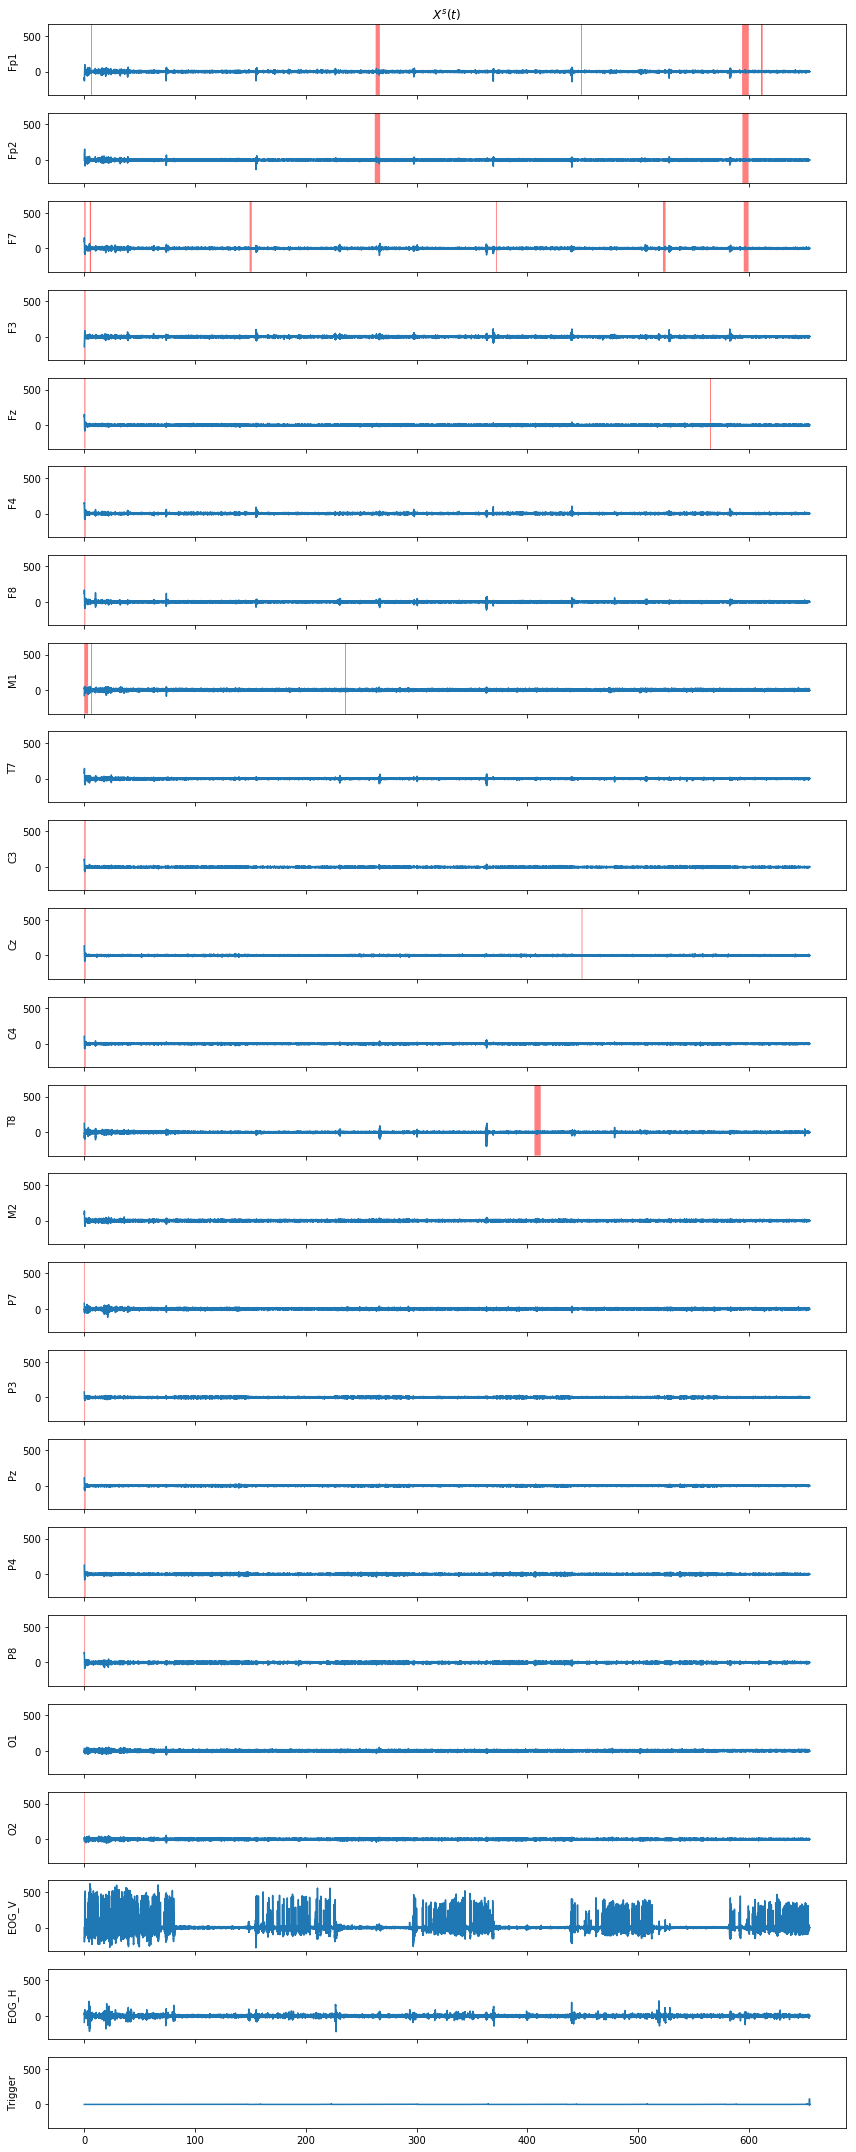

corr EOG_H,Fp1 = 0.06643611249931156
corr EOG_H,Fp2 = 0.07207228950605243
corr EOG_H,F7 = 0.027682818122379976
corr EOG_H,F3 = 0.07927875269799564
corr EOG_H,Fz = 0.12451907212717198
corr EOG_H,F4 = 0.11041708036270774
corr EOG_H,F8 = 0.05456993692137831
corr EOG_H,M1 = -0.03831065804354463
corr EOG_H,T7 = -0.027123021480942762
corr EOG_H,C3 = 0.02373137143537035
corr EOG_H,Cz = 0.06829053089126409
corr EOG_H,C4 = 0.042255939055415984
corr EOG_H,T8 = -0.026202534077809616
corr EOG_H,M2 = -0.10348634927230474
corr EOG_H,P7 = -0.06908437469410415
corr EOG_H,P3 = -0.04734538436568214
corr EOG_H,Pz = -0.021874368588370323
corr EOG_H,P4 = -0.051338385165041134
corr EOG_H,P8 = -0.09064568127116204
corr EOG_H,O1 = -0.06906179423856683
corr EOG_H,O2 = -0.08305109177093652
corr EOG_V,Fp1 = -0.10401383272351215
corr EOG_V,Fp2 = -0.1519783610911465
corr EOG_V,F7 = -0.01342867546474553
corr EOG_V,F3 = 0.0630777217427763
corr EOG_V,Fz = -0.05237166078734896
corr EOG_V,F4 = -0.1178014302972261
corr 

In [2]:
import time
import SOBI as sobi

#with Jacobi angles diagonalizer
start_time = time.time()
sobi_J = sobi.SOBI(X[0:23],[21,22],eps=1e-2)
Xc = np.zeros_like(X)
Xc[:21] = sobi_J.Xc[:21]
Xc[21:24] = X[21:24]
print("--- {:.2f} seconds total ---".format(time.time() - start_time))

corrH,corrV = corr(Xc,21,22)
OA = annotate(Xc,21,22)
show_OA(peeg,Xc,OA)

print(*['corr EOG_H,{} = {}'.format(peeg.signalLabels[i],np.mean(corrH,1)[i]) for i in range(21)],sep='\n')

print(*['corr EOG_V,{} = {}'.format(peeg.signalLabels[i],np.mean(corrV,1)[i]) for i in range(21)],sep='\n')


